# CS 282
### Programming Assignment 1
#### Item 5

Jan Lendl R. Uy

2019-00312

#### Sytem Specifications
- macOS Sequoia 15.0.1
- Macbook Air M1 (ARM), 8-Core CPU and 8-Core GPU

In [1]:
!pip install -r requirements.txt


[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
images_directory = "images"

In [4]:
def read_image(image_path):
    """
    Read image file regardless of format (including GIF)
    Returns grayscale numpy array
    """
    # Get file extension
    _, ext = os.path.splitext(image_path)
    ext = ext.lower()

    if ext in ['.gif', '.tif', '.tiff']:
        # Use PIL for GIF and TIFF files
        try:
            pil_img = Image.open(image_path)
            # Convert to grayscale
            if pil_img.mode != 'L':
                pil_img = pil_img.convert('L')
            # Convert to numpy array
            return np.array(pil_img)
        except Exception as e:
            print(f"Error reading image with PIL: {e}")
            return None
    else:
        # Use OpenCV for other formats
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        return img

In [5]:
def save_image(image_array, output_path):
    """
    Save a numpy array as an image file
    """
    try:
        # Get file extension to determine format
        _, ext = os.path.splitext(output_path)
        ext = ext.lower()
        
        if ext in ['.gif', '.tif', '.tiff']:
            # Use PIL for GIF and TIFF files
            pil_img = Image.fromarray(image_array)
            pil_img.save(output_path)
        else:
            # Use OpenCV for other formats (jpg, png, etc.)
            cv2.imwrite(output_path, image_array)
        
        print(f"Image successfully saved to {output_path}")
    
    except Exception as e:
        raise RuntimeError("Error saving image")

In [6]:
def display_enhancement_steps(images, titles, main_title="Image Enhancement Process", num_cols=None):
    """
    Display each step of the image enhancement process.
    """
    # Get the number of images
    n = len(images)
    
    # Determine the number of columns to use
    if num_cols is None:
        # Default behavior based on number of images
        if n <= 3:
            num_cols = n
        else:
            num_cols = 3  # Default to 3 columns for more images
    
    # Calculate the number of rows needed
    num_rows = int(np.ceil(n / num_cols))
    
    # Create a figure with appropriate size
    # Scale figure height based on number of rows
    fig_height = 5 * num_rows
    # Scale figure width based on number of columns
    fig_width = 5 * num_cols
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))
    
    # Convert axes to flat array for easier indexing (handles both single and multiple axes)
    if n > 1 and hasattr(axes, 'flatten'):
        axes = axes.flatten()
    elif not isinstance(axes, np.ndarray):
        axes = [axes]  # Make single axis iterable
    
    # Display each image with its corresponding title
    for i in range(n):
        axes[i].imshow(images[i], cmap='gray')
        
        # Add subtitle with increased padding
        axes[i].set_title(titles[i])
        axes[i].axis('off')

    # Hide any unused subplots
    for i in range(n, len(axes)):
        fig.delaxes(axes[i])
    
    # Add main title with increased spacing
    plt.suptitle(main_title, fontsize=16)
    
    # Adjust layout with more space between main title and subplots
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    
    plt.show()

## Dental Image


Processing images/dental.gif...


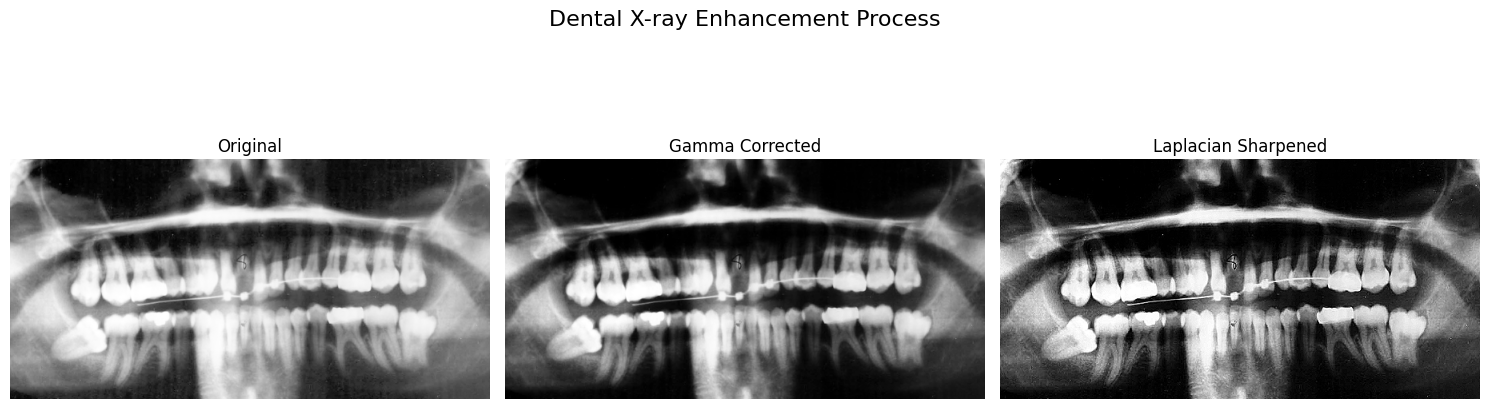

Image successfully saved to images/dental_enhanced.gif


In [12]:
# Dental X-ray enhancement
dental_img_dir = f"{images_directory}/dental.gif"

print(f"\nProcessing {dental_img_dir}...")
dental_img = read_image(dental_img_dir)

# Apply power-law transformation (gamma correction)
# Image is bright. Apply gamma > 1 to compress gray levels
gamma = 2
gamma_corrected = np.array(255 * (dental_img / 255) ** gamma, dtype=np.uint8)

# Apply Laplacian sharpening
kernel = np.array([[0, 1, 0],
                [1, -4, 1],
                [0, 1, 0]], dtype=np.float32)
laplacian = cv2.filter2D(gamma_corrected, cv2.CV_64F, kernel)
final_enhanced = np.uint8(np.clip(gamma_corrected - laplacian, 0, 255))

# Display all steps
images = [dental_img, gamma_corrected, final_enhanced]
titles = ["Original", "Gamma Corrected", "Laplacian Sharpened"]
display_enhancement_steps(images, titles, "Dental X-ray Enhancement Process")

# Save the enhanced image
save_image(final_enhanced, f"{images_directory}/dental_enhanced.gif")

### Rationale

To enhance the bright dental x-ray, the following image enhancement steps were applied: (i) power-law transformation with gamma = 2 to darken and reveal obscured tooth details and (ii) Laplacian sharpening to enhance edges of dental structures. These steps significantly improved visibility of dental features like tooth boundaries and cavities as well as the placement of braces on the upper teeth.

## Cells Image

Processing images/cells27.jpg...


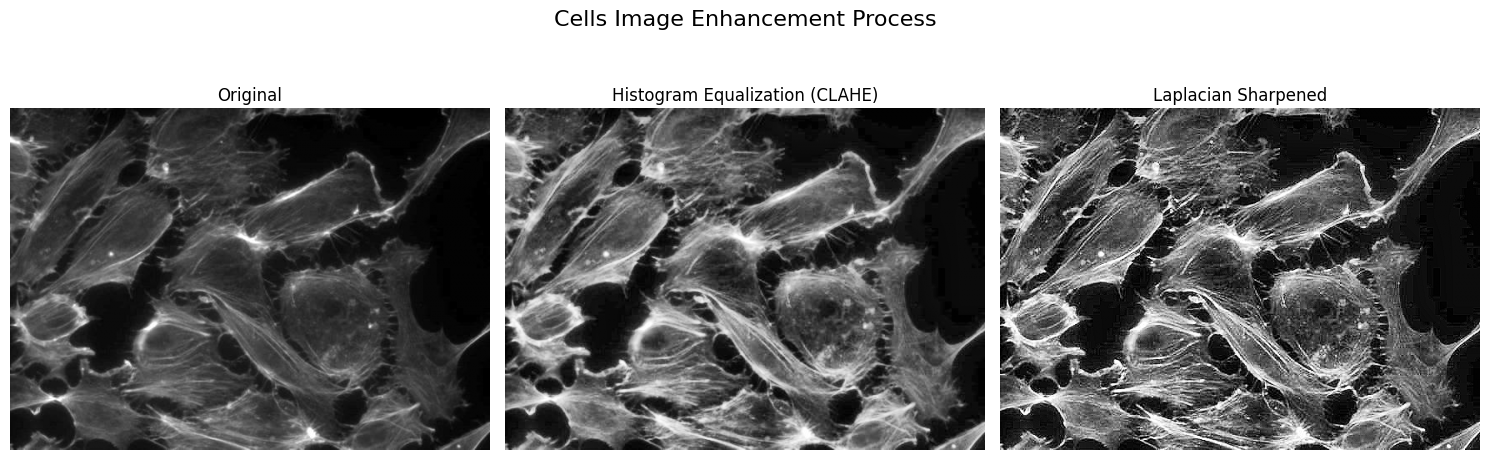

Image successfully saved to images/cells27_enhanced.jpg


In [8]:
# Cell image enhancement
cells_img_dir = f"{images_directory}/cells27.jpg"

print(f"Processing {cells_img_dir}...")
cells_img = read_image(cells_img_dir)

# Apply CLAHE for better cell visibility
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_result = clahe.apply(cells_img)

# Apply Laplacian sharpening
kernel = np.array([[0, 1, 0],
                [1, -4, 1],
                [0, 1, 0]], dtype=np.float32)
laplacian = cv2.filter2D(clahe_result, cv2.CV_64F, kernel)
final_enhanced = np.uint8(np.clip(clahe_result - laplacian, 0, 255))

images = [cells_img, clahe_result, final_enhanced]
titles = ['Original', 'Histogram Equalization (CLAHE)', 'Laplacian Sharpened']
display_enhancement_steps(images, titles, "Cells Image Enhancement Process")

# Save the enhanced image
save_image(final_enhanced, f"{images_directory}/cells27_enhanced.jpg")

### Rationale

The cell image suffered from poor contrast that obscured cellular structures. Histogram equalization with a clip limit of 2.0 was performed to enhance the contrast of the predominantly dark image. This step is then followed by Laplacian sharpening to emphasize cell boundaries and internal structures. Evidently, the enhanced image reveals cellular details and membranes that were barely visible in the original image, making it more suitable for analysis.

## Butterfly Image


Processing images/butterfly.gif...


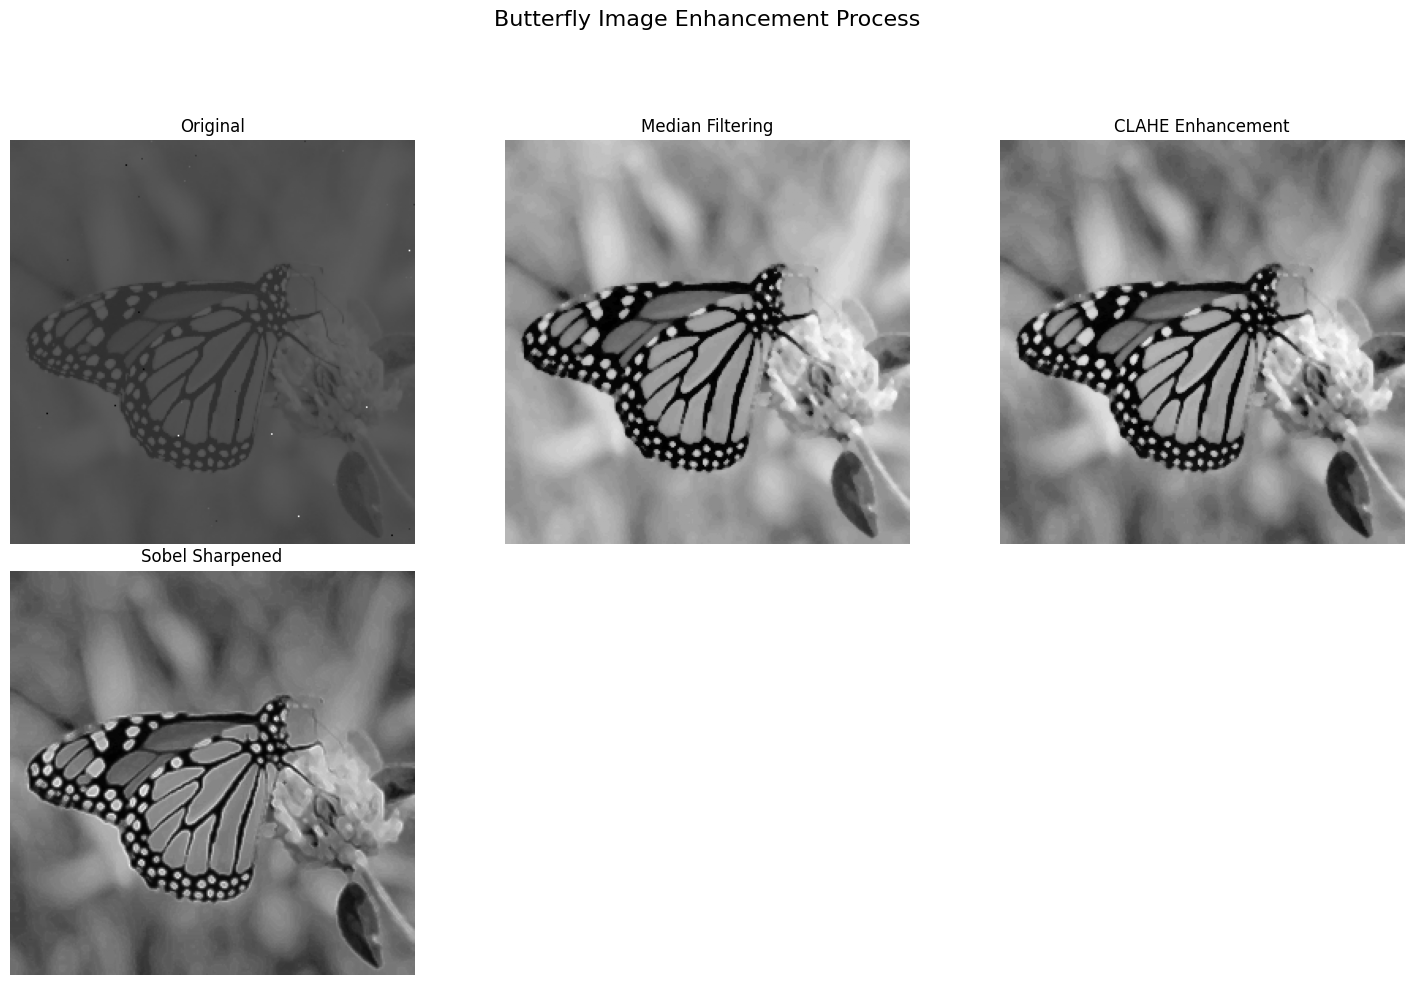

Image successfully saved to images/butterfly_enhanced.gif


In [9]:
# Butterfly image enhancement
butterfly_img_dir = f"{images_directory}/butterfly.gif"

print(f"\nProcessing {butterfly_img_dir}...")
butterfly_img = read_image(butterfly_img_dir)

# Apply median filter with 3x3 mask to reduce minimal salt-and-pepper noise
median_filter = cv2.medianBlur(butterfly_img, 3)

# Apply CLAHE to improve image contrast as resulting of median filtering
# is bright
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(5,5))
clahe_result = clahe.apply(median_filter)

# Apply image sharpening by subtracting CLAHE enhanced image with
# edges detected by Sobel

# Apply Sobel operators in x and y directions
sobelx = cv2.Sobel(clahe_result, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(clahe_result, cv2.CV_64F, 0, 1, ksize=3)

# Compute the magnitude of gradients
sobel_magnitude = cv2.magnitude(sobelx, sobely)

# Convert back to uint8 and normalize
sobel_magnitude = cv2.normalize(sobel_magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Blend the edge information with the CLAHE result
alpha = 0.2
final_enhanced = cv2.addWeighted(clahe_result, 1.0, sobel_magnitude, alpha, 0)

images = [butterfly_img, median_filter, clahe_result, final_enhanced]
titles = ['Original', 'Median Filtering', 'CLAHE Enhancement', 'Sobel Sharpened']
display_enhancement_steps(images, titles, "Butterfly Image Enhancement Process")

# Save the enhanced image
save_image(final_enhanced, f"{images_directory}/butterfly_enhanced.gif")

### Rationale

In this item, the butterfly image is generally dark with poor contrast and a few salt-and-pepper noise dispersed across the image. The enhancement steps taken here are (i) to remove the salt-and-pepper noise through a 3x3 median filter without blurring too much details, followed by (ii) histogram equalization to reduce the brightening effect of the previous step, and (iii) sharpening by adding Sobel-detected edges to recover the details blurred by the filtering step. The resulting butterfly image shows significantly improved visibility of wing patterns with balanced contrast.

## Mom and Kids Image


Processing images/momandkids.jpg...


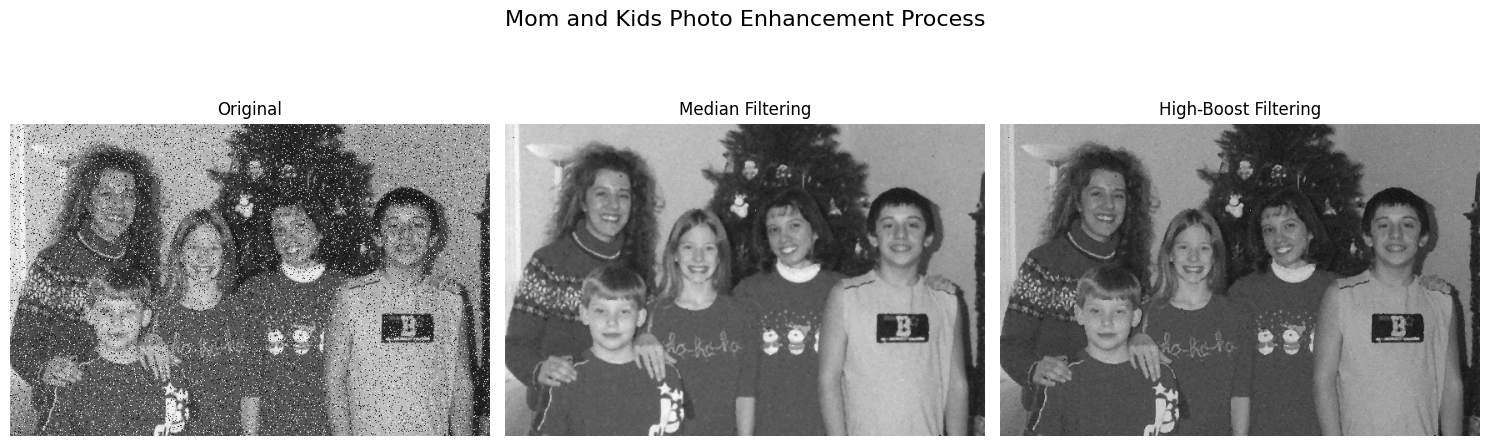

Image successfully saved to images/momandkids_enhanced.jpg


In [10]:
# Mom and kids photo enhancement
momandkids_img_dir = f"{images_directory}/momandkids.jpg"

print(f"\nProcessing {momandkids_img_dir}...")
momkids_img = read_image(momandkids_img_dir)

# Apply median filter with 3x3 mask to reduce salt-and-pepper noise
median_filtered = cv2.medianBlur(momkids_img, 3)

# Apply high-boost filtering
# A > 1 boosts the original image while maintaining sharpening
blur = cv2.GaussianBlur(median_filtered, (3,3), 2)
final_enhanced = cv2.addWeighted(median_filtered, 1.55, blur, -0.7, 0)

images = [momkids_img, median_filtered, final_enhanced]
titles = ['Original', 'Median Filtering', 'High-Boost Filtering']
display_enhancement_steps(images, titles, "Mom and Kids Photo Enhancement Process")

# Save the enhanced image
save_image(final_enhanced, f"{images_directory}/momandkids_enhanced.jpg")

### Rationale

The mom and kids image exhibited a generally noisy image that resemble salt-and-pepper noise. To enhance this image, a 3×3 median filter was applied to eliminate the salt-and-pepper noise while preserving edges. High-boost filtering with a factor of 1.55 was then applied to enhance details that were lost with the blurring that occurred in the previous step. The result shows significantly reduced salt-and-pepper noise and increased overall image sharpness.